In [2]:
import sys
import pandas as pd
import yfinance as yf
import numpy as np

Get adjusted close price for all the stocks in S&P 500 index since 2015.

In [59]:
def get_tickers():
    table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    tickers_df = table[0]
    tickers_list = tickers_df['Symbol'].tolist()
    return tickers_list


tickers = get_tickers()
df = yf.download(tickers, start='2014-12-31', end='2022-12-31')['Adj Close']

[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No timezone found, symbol may be delisted


Resample adjusted close price to month periods and calculate log returns for each month. We will assume that the trade happens at the end of each month.
Compounded return is calculated since the begginning of each month. The return values in the dataframe are expressed in logarithimc rate of return.

In [65]:
def log_transform(values):
    
    return np.log(values).diff()

def get_log_returns(data):
    
    data.index = pd.to_datetime(data.index)
    data = data.resample('1M').last().apply(custom_resampler)
    data = data.iloc[1:]  
    return data

returns = get_log_returns(df)
returns

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-31,-0.078147,-0.088657,-0.001759,0.059612,-0.073494,0.052817,-0.000512,-0.019305,-0.060940,-0.035991,...,-0.005460,0.043846,-0.055944,-0.062751,-0.110129,-0.002193,-0.011706,0.075251,-0.173869,-0.005118
2015-02-28,0.111142,-0.022312,-0.025931,0.096016,0.002483,0.080934,0.056674,0.020320,0.068969,0.120362,...,-0.027786,-0.061824,0.020229,0.057858,0.049820,0.115259,0.071345,0.087041,0.111296,0.075695
2015-03-31,-0.013300,0.097017,-0.034007,-0.031874,-0.032933,0.100903,-0.022200,0.040416,0.039849,-0.067459,...,-0.124013,-0.004079,-0.040803,-0.039423,-0.019231,-0.029909,-0.022282,-0.003631,0.009676,0.004330
2015-04-30,-0.004341,-0.086860,-0.045722,0.005770,0.107692,0.005527,0.007044,-0.015048,-0.000524,0.028268,...,-0.125168,-0.026195,0.027501,0.002160,0.055539,0.093236,-0.067584,0.014880,0.048437,-0.039443
2015-05-31,-0.004360,-0.130784,0.069031,0.044341,0.029412,-0.012800,0.045893,0.051549,0.035936,0.039064,...,-0.093707,0.004120,-0.016914,0.020187,-0.008411,0.047149,0.039925,0.174544,0.020934,0.113723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,-0.044604,-0.053946,-0.138131,-0.031705,-0.065138,0.007416,-0.058554,0.029296,-0.059878,-0.093692,...,-0.046595,0.014516,-0.004252,-0.098440,-0.006867,-0.091856,-0.037566,-0.170432,0.015735,-0.153777
2022-09-30,-0.053656,-0.075945,-0.066873,-0.128944,-0.001861,-0.079719,-0.059091,-0.003945,-0.114314,-0.305259,...,0.039481,-0.142034,-0.090603,-0.140680,-0.041920,-0.045048,-0.014553,-0.140852,-0.078802,-0.054078
2022-10-31,0.131190,0.163598,0.194570,0.103956,0.097061,0.149930,0.026987,0.233194,0.102816,0.146124,...,0.013709,0.017195,0.238352,0.083537,0.159142,0.106159,0.080815,0.077841,0.021012,0.018775


Visualize monthly log returns of the exemplary stock in percentages.

Date
2015-01-31    0.133092
2015-02-28    0.069799
2015-03-31   -0.021430
2015-04-30    0.125321
2015-05-31    0.017509
                ...   
2022-08-31   -0.062530
2022-09-30   -0.114987
2022-10-31   -0.098111
2022-11-30   -0.059320
2022-12-31   -0.139141
Freq: M, Name: AMZN, Length: 96, dtype: float64


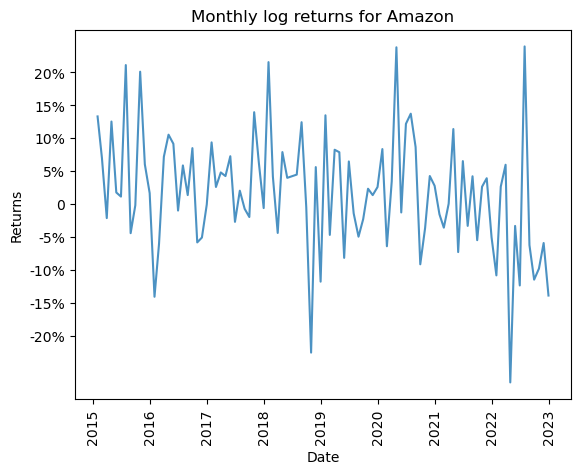

In [67]:
import matplotlib.pyplot as plt

print(returns['AMZN'])

plt.plot(returns.index, returns['AMZN'].fillna(0)*100, alpha = .8)
plt.title('Monthly log returns for Amazon')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.xticks(rotation=90) # rotating x-ticks
plt.yticks([0, 5, 10, 15, 20, -5, -10, -15, -20], 
           ['0', '5%', '10%', '15%', '20%', '-5%', '-10%', '-15%', '-20%'])
plt.show()



Shifting returns to move through the time series.

In [69]:
def shift_returns(returns, n_shift):
    return returns.shift(n_shift)

previous_returns = shift_returns(returns, 1)
next_returns = shift_returns(returns, -1)


Date
2015-01-31    0.069799
2015-02-28   -0.021430
2015-03-31    0.125321
2015-04-30    0.017509
2015-05-31    0.011259
                ...   
2022-08-31   -0.114987
2022-09-30   -0.098111
2022-10-31   -0.059320
2022-11-30   -0.139141
2022-12-31         NaN
Freq: M, Name: AMZN, Length: 96, dtype: float64
Date
2015-01-31         NaN
2015-02-28    0.133092
2015-03-31    0.069799
2015-04-30   -0.021430
2015-05-31    0.125321
                ...   
2022-08-31    0.239486
2022-09-30   -0.062530
2022-10-31   -0.114987
2022-11-30   -0.098111
2022-12-31   -0.059320
Freq: M, Name: AMZN, Length: 96, dtype: float64


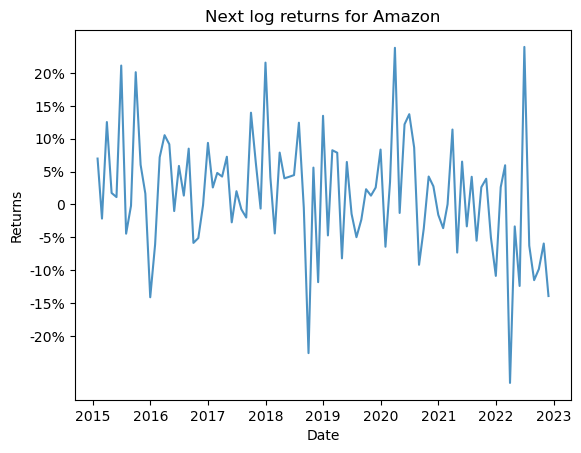

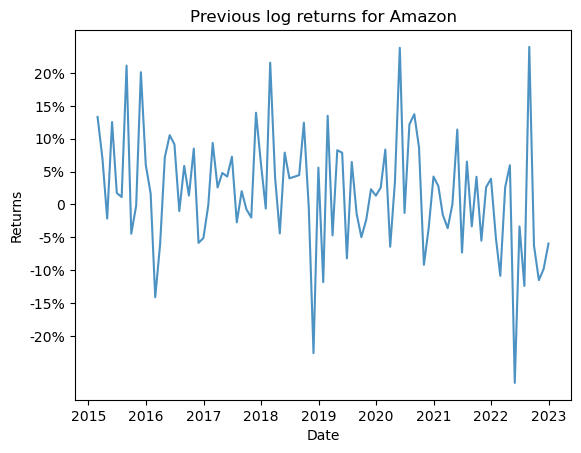

In [71]:
next_returns = returns.shift(-1)
previous_returns = returns.shift(1)
print(next_returns['AMZN'])
print(previous_returns['AMZN'])

plt.plot(next_returns.index, next_returns['AMZN']*100, alpha = .8)
plt.title('Next log returns for Amazon')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.yticks([0, 5, 10, 15, 20, -5, -10, -15, -20], 
           ['0', '5%', '10%', '15%', '20%', '-5%', '-10%', '-15%', '-20%'])
plt.show()

plt.plot(previous_returns.index, previous_returns['AMZN']*100, alpha = .8)
plt.title('Previous log returns for Amazon')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.yticks([0, 5, 10, 15, 20, -5, -10, -15, -20], 
           ['0', '5%', '10%', '15%', '20%', '-5%', '-10%', '-15%', '-20%'])
plt.show()